In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print('x_train shape:', x_train.shape, 'y_train shape:', y_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


60000 train set
10000 test set
y = 3 Dress


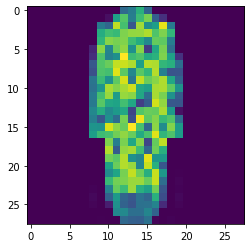

In [2]:
## Visualize the data

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

img_index = np.random.randint(0, 59999)

# y_train contains the labels (0 ~ 9)
label_index = y_train[img_index]

# print the label
print("y = " + str(label_index) + " " + (fashion_mnist_labels[label_index]))

plt.imshow(x_train[img_index])

In [3]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [4]:
# Scaling
max_n, min_n = x_train.max(), x_train.min()

x_train = (x_train - min_n) / (max_n - min_n)
x_test = (x_test - min_n) / (max_n - min_n)

In [5]:
# to_categorical
from tensorflow.keras.utils import to_categorical

print(y_train.shape)

len_y = len(set(y_train))
y_train = to_categorical(y_train, len_y)
y_test = to_categorical(y_test, len_y)

print(y_train.shape)

(60000,)
(60000, 10)


In [6]:
# 1. Session Clear
keras.backend.clear_session()

# 2. Model
model = keras.models.Sequential()

# 3. Layer Add
model.add(keras.layers.Input(shape=(28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# 4. Compile
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
              optimizer=keras.optimizers.Adam(learning_rate=0.01))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,195,018
Trainable params: 1,195,018
Non-

In [8]:
# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=8,
                   verbose=1,
                   restore_best_weights=True)

In [9]:
# 5. fit
model.fit(x_train, y_train, validation_split=0.2, callbacks=[es],
          verbose=1, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 6s 3ms/step - loss: 0.7941 - accuracy: 0.7271 - val_loss: 0.6003 - val_accuracy: 0.7831
Epoch 2/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7994 - val_loss: 0.5027 - val_accuracy: 0.8172
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4970 - accuracy: 0.8240 - val_loss: 0.5076 - val_accuracy: 0.8298
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4862 - accuracy: 0.8322 - val_loss: 0.6063 - val_accuracy: 0.8374
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4734 - accuracy: 0.8354 - val_loss: 0.4789 - val_accuracy: 0.8405
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5413 - accuracy: 0.8262 - val_loss: 0.5200 - val_accuracy: 0.8272
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4848 - accuracy: 0.8365 - val_loss: 0.4579 - val_accuracy:

In [10]:
## Visualize predict

score = model.evaluate(x_test, y_test, verbose=0)

print('\n', 'Test Accuracy:', score[1])
y_hat = model.predict(x_test).argmax(axis=1)


 Test Accuracy: 0.8446999788284302


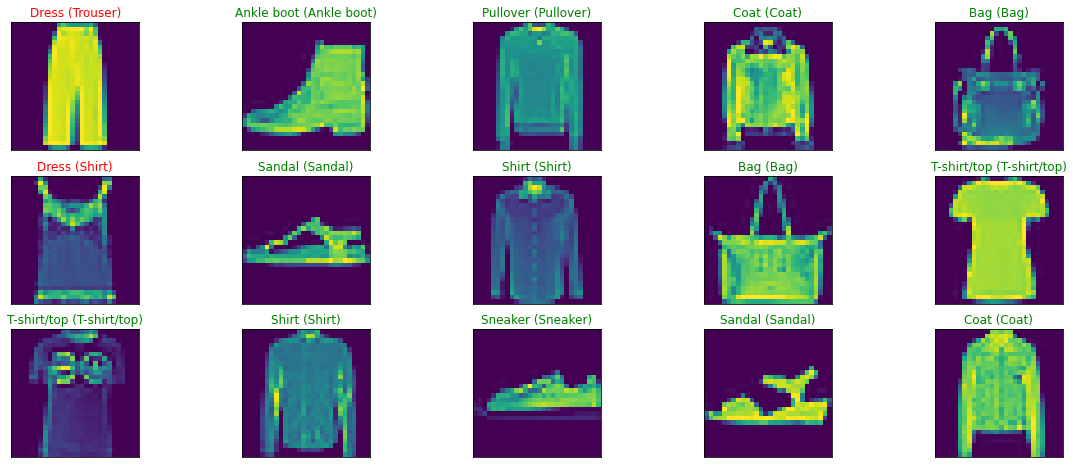

In [11]:
# Plot a random sample of 10 test images, predicted labels
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index].reshape([28,-1]) ) )
    predict_index = y_hat[index]
    true_index = y_test[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))